In [4]:
# Ventana de tiempo prepandemia 
import pandas as pd  # Pandas proporciona estructuras de datos y herramientas para el análisis de datos.
import seaborn as sns  # Seaborn es una biblioteca de visualización de datos basada en matplotlib.
import matplotlib.pyplot as plt  # Matplotlib es una biblioteca de gráficos 2D que produce figuras de calidad de publicación.
from pathlib import Path  # Pathlib ofrece clases para manejar rutas de archivos de manera orientada a objetos.
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import numpy as np
import os  # La biblioteca os permite interactuar con el sistema operativo.

In [5]:
s_path = Path.cwd()  # Obtiene el directorio de trabajo actual como un objeto Path.
s_prt_path = s_path.parent/'..'/'Datasets' # Accede al directorio padre del directorio actual. Utilizamos '..' para subir un nivel en la jerarquía de directorios.
ruta_carpeta_atras = s_prt_path.resolve() # Normalizamos la ruta para resolver cualquier ruta relativa
ruta_csv = os.path.join(s_prt_path,'Data_XM.csv')  # Crea una ruta al archivo CSV en el directorio padre.
df_DataModel= pd.read_csv(ruta_csv)  # Lee el archivo CSV en un DataFrame de pandas.

In [6]:
df_DataModel['Date'] = pd.to_datetime(df_DataModel['Date'])  # Convierte la columna 'Date' a tipo datetime.
df_DataModel.drop('Unnamed: 0', axis=1, inplace=True)  # Elimina la columna 'Unnamed: 0'.

In [7]:
df_DataModel.head(-1)

,Date,Demanda,VolUtil,Aportes,PrecioB,PrecioO,DispTer,DispNoTer
0,2000-01-01,3.619477e+06,1.080803e+10,56677300.0,32.868123,98.359312,2.846091e+06,7.774834e+06
1,2000-01-02,3.660170e+06,1.078818e+10,54645200.0,33.034790,96.103387,2.754967e+06,7.766716e+06
2,2000-01-03,4.366035e+06,1.075306e+10,57488300.0,37.272290,96.537377,2.751592e+06,7.761926e+06
3,2000-01-04,4.491048e+06,1.071967e+10,58418200.0,41.688957,96.636300,2.751300e+06,7.744445e+06
4,2000-01-05,4.459620e+06,1.068971e+10,63039500.0,40.893123,94.805851,2.751300e+06,7.759892e+06
...,...,...,...,...,...,...,...,...
8880,2024-04-25,9.515666e+06,5.340366e+09,168278300.0,233.410862,461.527381,5.006626e+06,1.017114e+07
8881,2024-04-26,9.214009e+06,5.399084e+09,175197100.0,215.204868,464.153945,4.907384e+06,1.001498e+07
8882,2024-04-27,8.910324e+06,5.454065e+09,190925700.0,160.223312,462.146903,4.588657e+06,1.006170e+07
8883,2024-04-28,7.971372e+06,5.557993e+09,206187700.0,106.820390,447.745353,4.611806e+06,1.065486e+07


In [8]:
df_DataModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8886 entries, 0 to 8885
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8886 non-null   datetime64[ns]
 1   Demanda    8886 non-null   float64       
 2   VolUtil    8886 non-null   float64       
 3   Aportes    8886 non-null   float64       
 4   PrecioB    8886 non-null   float64       
 5   PrecioO    8886 non-null   float64       
 6   DispTer    8886 non-null   float64       
 7   DispNoTer  8886 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 555.5 KB


In [104]:
# Establece la fecha límite hasta la cual deseas mantener los datos para la prueba
start_time = pd.to_datetime('2000-01-01')
end_time = pd.to_datetime('2024-03-31')

In [105]:
# Filtra el DataFrame
filtered_df = df_DataModel[df_DataModel['Date'].between(start_time, end_time)]

In [106]:
# Convertir la columna de fecha a múltiples columnas numéricas
filtered_df['year'] = filtered_df['Date'].dt.year
filtered_df['month'] = filtered_df['Date'].dt.month
filtered_df['day'] = filtered_df['Date'].dt.day
filtered_df = filtered_df.drop('Date', axis=1)

C:\Users\yanal\AppData\Local\Temp\ipykernel_11188\256231009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['Date'].dt.year
C:\Users\yanal\AppData\Local\Temp\ipykernel_11188\256231009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['Date'].dt.month
C:\Users\yanal\AppData\Local\Temp\ipykernel_11188\256231009.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [107]:
filtered_df.head(-1)

,Demanda,VolUtil,Aportes,PrecioB,PrecioO,DispTer,DispNoTer,year,month,day
0,3.619477e+06,1.080803e+10,56677300.0,32.868123,98.359312,2.846091e+06,7.774834e+06,2000,1,1
1,3.660170e+06,1.078818e+10,54645200.0,33.034790,96.103387,2.754967e+06,7.766716e+06,2000,1,2
2,4.366035e+06,1.075306e+10,57488300.0,37.272290,96.537377,2.751592e+06,7.761926e+06,2000,1,3
3,4.491048e+06,1.071967e+10,58418200.0,41.688957,96.636300,2.751300e+06,7.744445e+06,2000,1,4
4,4.459620e+06,1.068971e+10,63039500.0,40.893123,94.805851,2.751300e+06,7.759892e+06,2000,1,5
...,...,...,...,...,...,...,...,...,...,...
8850,9.729050e+06,5.633694e+09,77876900.0,836.337190,573.499110,5.147849e+06,9.051324e+06,2024,3,26
8851,9.263611e+06,5.585317e+09,72693500.0,927.814510,607.823857,4.932176e+06,8.782151e+06,2024,3,27
8852,8.391533e+06,5.555902e+09,65809800.0,851.265372,659.285783,5.252463e+06,8.796540e+06,2024,3,28
8853,8.072650e+06,5.530486e+09,67556600.0,812.674193,658.555177,4.967830e+06,8.674165e+06,2024,3,29


In [108]:
# Preparar los datos
X = filtered_df.drop('PrecioB', axis=1)  # todas las columnas excepto 'PrecioB'
y = filtered_df['PrecioB']  # la columna 'PrecioB'

In [109]:
print(X)

           Demanda       VolUtil     Aportes     PrecioO       DispTer  \
0     3.619477e+06  1.080803e+10  56677300.0   98.359312  2.846091e+06   
1     3.660170e+06  1.078818e+10  54645200.0   96.103387  2.754967e+06   
2     4.366035e+06  1.075306e+10  57488300.0   96.537377  2.751592e+06   
3     4.491048e+06  1.071967e+10  58418200.0   96.636300  2.751300e+06   
4     4.459620e+06  1.068971e+10  63039500.0   94.805851  2.751300e+06   
...            ...           ...         ...         ...           ...   
8851  9.263611e+06  5.585317e+09  72693500.0  607.823857  4.932176e+06   
8852  8.391533e+06  5.555902e+09  65809800.0  659.285783  5.252463e+06   
8853  8.072650e+06  5.530486e+09  67556600.0  658.555177  4.967830e+06   
8854  8.690871e+06  5.488068e+09  66343100.0  635.040607  5.024550e+06   
8855  8.479148e+06  5.469610e+09  77779900.0  576.674350  5.056939e+06   

         DispNoTer  year  month  day  
0     7.774834e+06  2000      1    1  
1     7.766716e+06  2000      1  

In [110]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),

                            },cv=5, scoring='neg_root_mean_squared_error',verbose=1,n_jobs=-1
                           )

In [112]:
# Entrenar el modelo
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             scoring='neg_root_mean_squared_error', verbose=1)

In [113]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f'Mejores hiperparámetros: {best_params}')

Mejores hiperparámetros: {'max_features': 0.8000000000000002, 'n_estimators': 75}


In [16]:
# Obtener el mejor score
best_score = grid_search.best_score_
print(f'Mejor score: {best_score}')

Mejor score: -35.66010365327126


In [114]:
grid_search.cv_results_

{'mean_fit_time': array([0.10472369, 0.18162699, 0.20941119, 0.48865881, 0.62305541,
        0.52846293, 0.54344325, 0.69326777, 0.68441615, 0.61789956,
        0.67164536, 0.71126456, 0.75834088, 0.962781  , 0.96641083,
        0.97465348, 1.08749104, 1.14061666, 1.14361143, 0.07015753,
        0.11591902, 0.17992768, 0.22220559, 0.28869815, 0.34811206,
        0.39695992, 0.48010626, 0.52420993, 0.56656451, 0.62812166,
        0.67240729, 0.76287374, 0.79228115, 0.85416145, 0.93332939,
        1.02820368, 1.15142422, 1.23265781, 0.05637593, 0.15155678,
        0.18479958, 0.23840766, 0.33086648, 0.38939972, 0.46710281,
        0.60149398, 0.66520181, 0.60593476, 0.66069493, 0.68286915,
        0.75520535, 0.799368  , 0.85221815, 0.93321924, 0.94156532,
        1.04541063, 1.06565213, 0.08944001, 0.17389135, 0.26952415,
        0.34690409, 0.42984114, 0.51086273, 0.57971082, 0.66402287,
        0.76544814, 0.81419644, 0.89680805, 0.99209266, 1.06107845,
        1.14368672, 1.21621737,

In [115]:
# Crear el modelo de Random Forest con los mejores hiperparámetros
best_model = RandomForestRegressor(n_estimators=75, max_features= 0.8, random_state=42)

In [116]:
# Entrenar el modelo
best_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.8, n_estimators=75, random_state=42)

In [117]:
# Hacer predicciones con el conjunto de prueba
predictions = best_model.predict(X_test)

In [118]:
# Calcular el RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE: {rmse}')

RMSE: 31.46951536975607


C:\Users\yanal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [119]:
# Calcular el MAE
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae}')

MAE: 15.426339883330199


In [120]:
# Calcular el R^2
r2 = r2_score(y_test, predictions)
print(f'R^2: {r2}')

R^2: 0.960094469085534


In [121]:
# Calcular los residuos
residuos = y_test - predictions

In [122]:
# Calcular las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5)

In [123]:
# Calcular las medias y desviaciones estándar de los scores de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

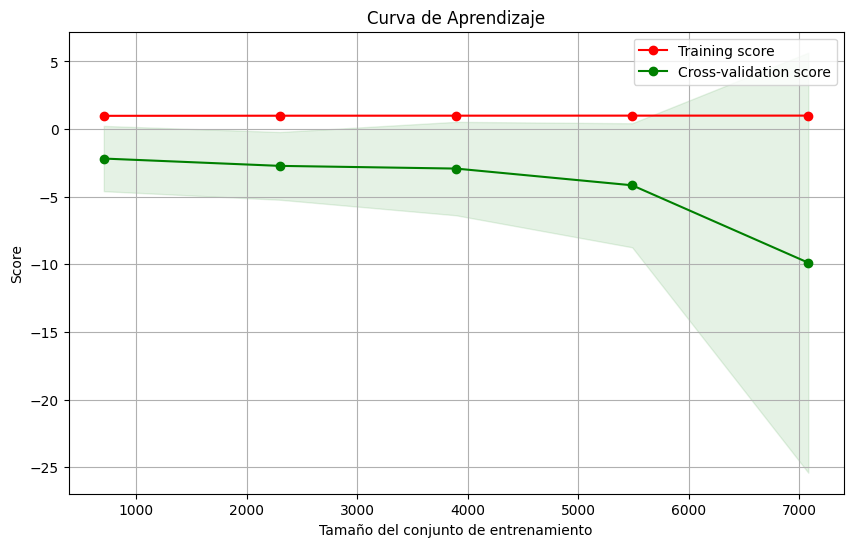

In [124]:
# Crear el gráfico
plt.figure(figsize=(10,6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Score')
plt.title('Curva de Aprendizaje')
plt.legend(loc="best")
plt.grid()
plt.show()

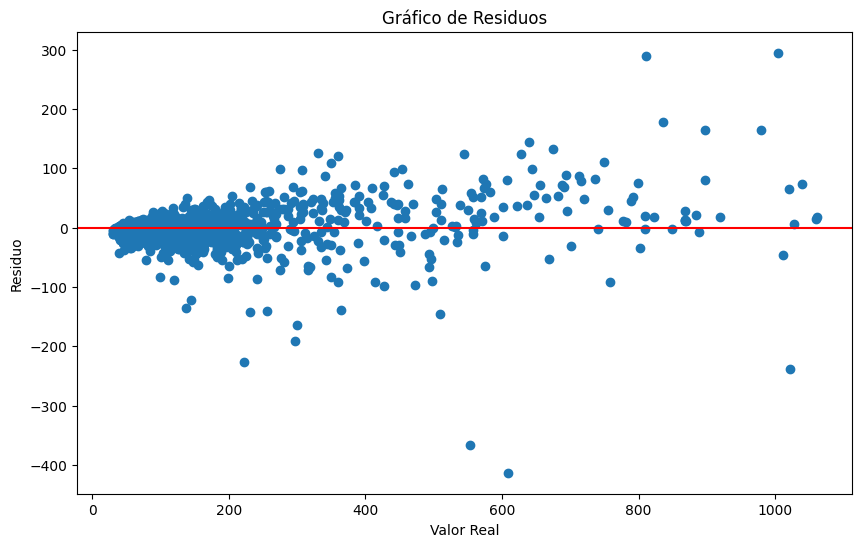

In [125]:
# Crear el gráfico de residuos
plt.figure(figsize=(10,6))
plt.scatter(y_test, residuos)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valor Real')
plt.ylabel('Residuo')
plt.title('Gráfico de Residuos')
plt.show()

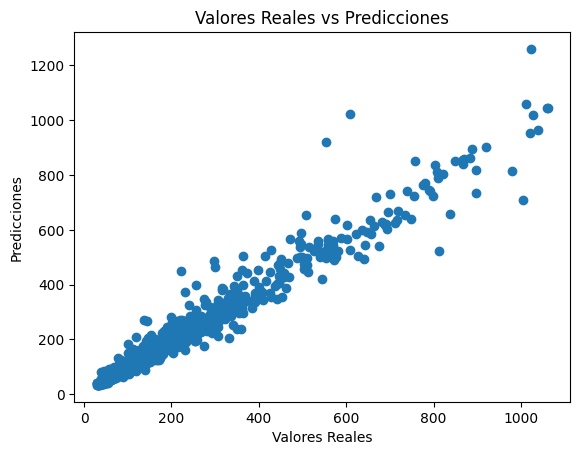

In [126]:
#Gráfico de dispersión de valores reales vs. predichos
plt.scatter(y_test, predictions)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

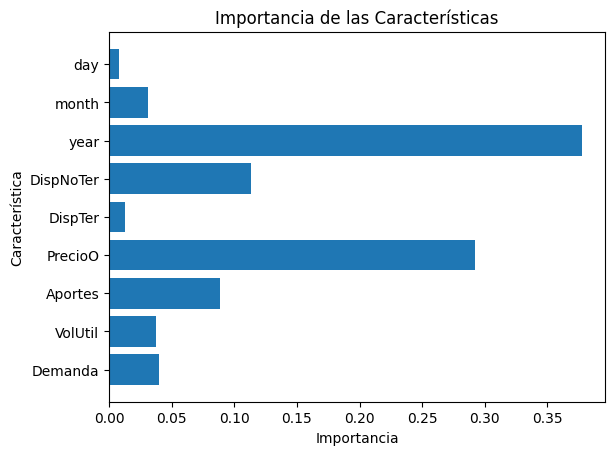

In [128]:
#Importancia de las características: 
importances = best_model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características')
plt.show()

In [142]:
#Predicciones entre 2022 a 2024
# Establece la fecha límite hasta la cual deseas mantener los datos para la prueba
start_time_future = pd.to_datetime('2024-04-01')
end_time_future = pd.to_datetime('2024-04-30')

In [143]:
# Filtra el DataFrame
df_future = df_DataModel[df_DataModel['Date'].between(start_time_future, end_time_future)]

In [144]:
precioB_future = df_future['PrecioB']  # la columna 'PrecioB'

In [145]:
df_future.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 8856 to 8885
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       30 non-null     datetime64[ns]
 1   Demanda    30 non-null     float64       
 2   VolUtil    30 non-null     float64       
 3   Aportes    30 non-null     float64       
 4   PrecioB    30 non-null     float64       
 5   PrecioO    30 non-null     float64       
 6   DispTer    30 non-null     float64       
 7   DispNoTer  30 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 2.1 KB


In [146]:
# Convertir la columna de fecha a múltiples columnas numéricas
df_future['year'] = df_future['Date'].dt.year
df_future['month'] = df_future['Date'].dt.month
df_future['day'] = df_future['Date'].dt.day
df_future = df_future.drop('Date', axis=1)

C:\Users\yanal\AppData\Local\Temp\ipykernel_11188\4289330071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_future['year'] = df_future['Date'].dt.year
C:\Users\yanal\AppData\Local\Temp\ipykernel_11188\4289330071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_future['month'] = df_future['Date'].dt.month
C:\Users\yanal\AppData\Local\Temp\ipykernel_11188\4289330071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [147]:
df_future2 = df_future.drop('PrecioB', axis=1)  # todas las columnas excepto 'PrecioB'

In [148]:
df_future2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 8856 to 8885
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Demanda    30 non-null     float64
 1   VolUtil    30 non-null     float64
 2   Aportes    30 non-null     float64
 3   PrecioO    30 non-null     float64
 4   DispTer    30 non-null     float64
 5   DispNoTer  30 non-null     float64
 6   year       30 non-null     int32  
 7   month      30 non-null     int32  
 8   day        30 non-null     int32  
dtypes: float64(6), int32(3)
memory usage: 2.0 KB


In [149]:
predicciones_futuras = best_model.predict(df_future2)

In [150]:
print(f'Las predicciones de PrecioB para los datos futuros son: {predicciones_futuras}')

Las predicciones de PrecioB para los datos futuros son: [679.17017287 618.92297869 736.74437531 789.51055829 686.11511024
 705.88960911 626.84714638 691.85986796 738.02301847 769.47344284
 772.61789964 766.24699013 764.55577713 770.37559598 778.26324696
 790.93063853 813.77867709 805.32979933 665.4360456  580.15072436
 577.47140584 332.20626956 321.50575267 453.69817138 437.53194642
 417.21020978 293.68214476 282.24937684 293.642443   301.87691389]


In [151]:
# Crear un nuevo DataFrame con las predicciones y las columnas de fecha
df_predicciones = pd.DataFrame({
    'year': df_future['year'],
    'month': df_future['month'],
    'day': df_future['day'],
    'Prediccion_PrecioB': predicciones_futuras
})

In [152]:
print(df_predicciones)

      year  month  day  Prediccion_PrecioB
8856  2024      4    1          679.170173
8857  2024      4    2          618.922979
8858  2024      4    3          736.744375
8859  2024      4    4          789.510558
8860  2024      4    5          686.115110
8861  2024      4    6          705.889609
8862  2024      4    7          626.847146
8863  2024      4    8          691.859868
8864  2024      4    9          738.023018
8865  2024      4   10          769.473443
8866  2024      4   11          772.617900
8867  2024      4   12          766.246990
8868  2024      4   13          764.555777
8869  2024      4   14          770.375596
8870  2024      4   15          778.263247
8871  2024      4   16          790.930639
8872  2024      4   17          813.778677
8873  2024      4   18          805.329799
8874  2024      4   19          665.436046
8875  2024      4   20          580.150724
8876  2024      4   21          577.471406
8877  2024      4   22          332.206270
8878  2024 

In [153]:
precio_real = df_DataModel[df_DataModel['Date'] == '2024-05-6']
print(precio_real)

Empty DataFrame
Columns: [Date, Demanda, VolUtil, Aportes, PrecioB, PrecioO, DispTer, DispNoTer]
Index: []


In [154]:
# Calcular el RMSE
rmse_future = mean_squared_error(precioB_future, predicciones_futuras, squared=False)
print(f'RMSE: {rmse_future}')

RMSE: 252.5295155438538


C:\Users\yanal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [155]:
# Calcular el R^2
r2_future = r2_score(precioB_future, predicciones_futuras)
print(f'R^2: {r2_future}')

R^2: 0.5220711296268508


In [156]:
# Calcular los residuos
residuos_future = precioB_future - predicciones_futuras

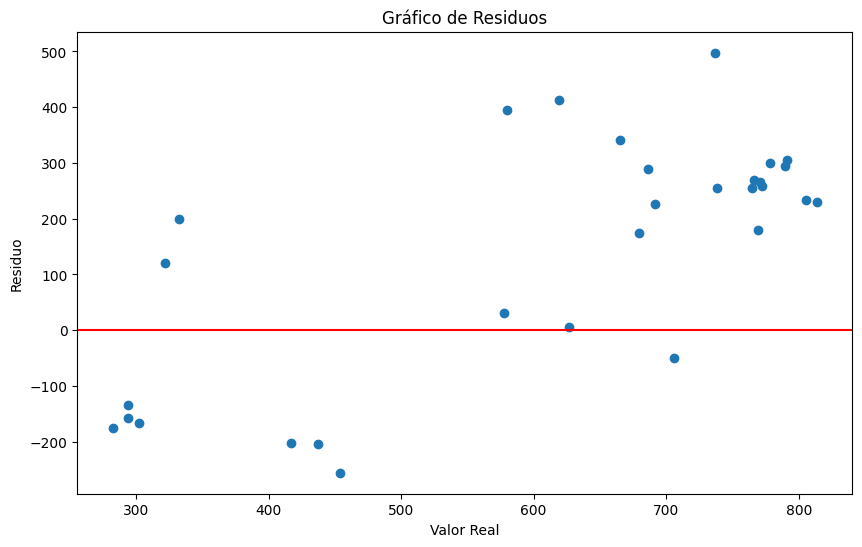

In [157]:
# Crear el gráfico de residuos
plt.figure(figsize=(10,6))
plt.scatter(predicciones_futuras, residuos_future)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valor Real')
plt.ylabel('Residuo')
plt.title('Gráfico de Residuos')
plt.show()

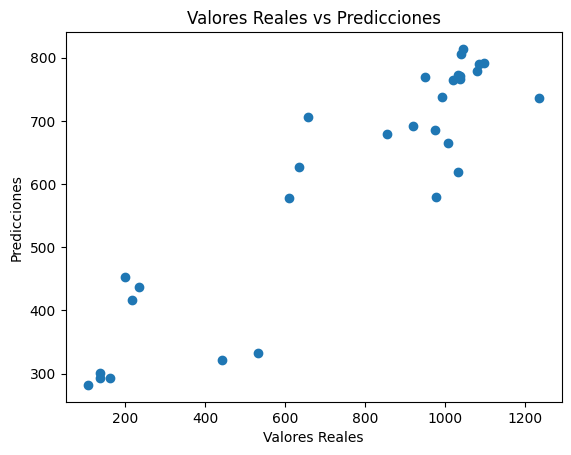

In [158]:
#Gráfico de dispersión de valores reales vs. predichos
plt.scatter(precioB_future, predicciones_futuras)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

In [159]:
df_future.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 8856 to 8885
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Demanda    30 non-null     float64
 1   VolUtil    30 non-null     float64
 2   Aportes    30 non-null     float64
 3   PrecioB    30 non-null     float64
 4   PrecioO    30 non-null     float64
 5   DispTer    30 non-null     float64
 6   DispNoTer  30 non-null     float64
 7   year       30 non-null     int32  
 8   month      30 non-null     int32  
 9   day        30 non-null     int32  
dtypes: float64(7), int32(3)
memory usage: 2.2 KB


In [160]:
df_predicciones['Date'] = pd.to_datetime(df_predicciones[['year', 'month', 'day']])
df_predicciones = df_predicciones.drop(['year', 'month', 'day'], axis=1)

In [161]:
df_predicciones.head(30)

,Prediccion_PrecioB,Date
8856,679.170173,2024-04-01
8857,618.922979,2024-04-02
8858,736.744375,2024-04-03
8859,789.510558,2024-04-04
8860,686.115110,2024-04-05
8861,705.889609,2024-04-06
8862,626.847146,2024-04-07
8863,691.859868,2024-04-08
8864,738.023018,2024-04-09
8865,769.473443,2024-04-10


In [162]:
# Añadir 'precioB_future' al DataFrame
df_predicciones= df_predicciones.assign(PrecioB_future=precioB_future)

In [163]:
df_predicciones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 8856 to 8885
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Prediccion_PrecioB  30 non-null     float64       
 1   Date                30 non-null     datetime64[ns]
 2   PrecioB_future      30 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 960.0 bytes


In [164]:
df_predicciones.head(10)

,Prediccion_PrecioB,Date,PrecioB_future
8856,679.170173,2024-04-01,853.935372
8857,618.922979,2024-04-02,1031.555260
8858,736.744375,2024-04-03,1234.524397
8859,789.510558,2024-04-04,1083.786918
8860,686.115110,2024-04-05,975.249068
8861,705.889609,2024-04-06,655.857048
8862,626.847146,2024-04-07,633.127673
8863,691.859868,2024-04-08,918.368390
8864,738.023018,2024-04-09,992.514312
8865,769.473443,2024-04-10,948.641637


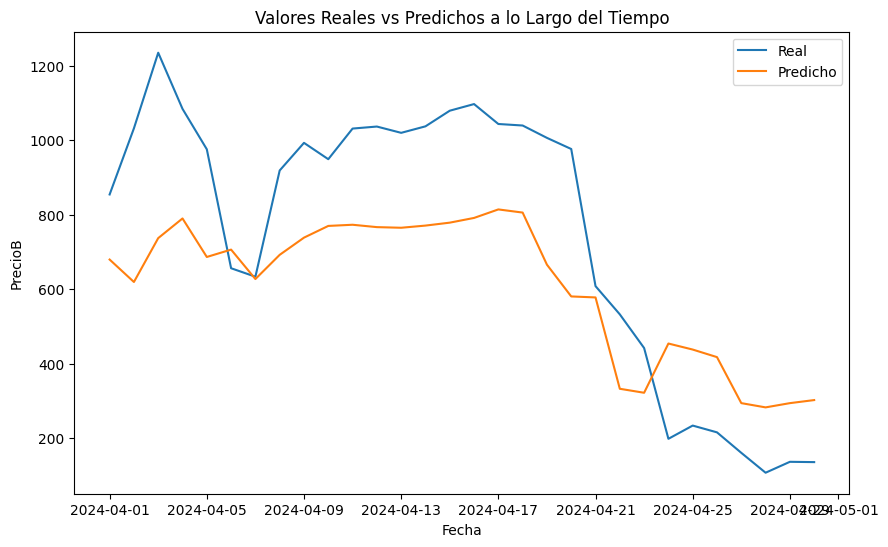

In [165]:
# Crear el gráfico de líneas
plt.figure(figsize=(10,6))
plt.plot(df_predicciones['Date'], df_predicciones['PrecioB_future'], label='Real')
plt.plot(df_predicciones['Date'], df_predicciones['Prediccion_PrecioB'], label='Predicho')
plt.xlabel('Fecha')
plt.ylabel('PrecioB')
plt.title('Valores Reales vs Predichos a lo Largo del Tiempo')
plt.legend()
plt.show()